In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import math
from sklearn.model_selection import train_test_split


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv(r'C:\Users\pandh\Desktop\Stevens Assignment Folder\Multivariate Assignments\Final Project Data\wine_quality_data.csv')
wine_quality = pd.read_csv(r'C:\Users\pandh\Desktop\Stevens Assignment Folder\Multivariate Assignments\Final Project Data\wine_quality_data.csv')
wine_quality


,fixed acid,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,4
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,4
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,4
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,4
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,4
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,4
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,4
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,4
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,4
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,4


In [ ]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 12 columns):
fixed acid             1598 non-null float64
volatile acidity       1598 non-null float64
citric acid            1598 non-null float64
residual sugar         1598 non-null float64
chlorides              1598 non-null float64
free sulfur dioxide    1598 non-null float64
total sulfur           1598 non-null float64
density                1598 non-null float64
pH                     1598 non-null float64
sulphates              1598 non-null float64
alcohol                1598 non-null float64
quality                1598 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [ ]:
wine_quality.describe()

,fixed acid,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur,density,pH,sulphates,alcohol,quality
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,7.017397,0.280235,0.363379,6.049937,0.046362,34.902378,143.766896,0.994390,3.206621,0.487516,10.285482,3.874844
std,0.879345,0.103289,0.138814,4.996129,0.022990,16.430367,44.201412,0.002685,0.156661,0.115772,1.124276,0.935948
min,4.800000,0.080000,0.000000,0.800000,0.017000,3.000000,19.000000,0.988600,2.740000,0.250000,8.500000,1.000000
25%,6.400000,0.210000,0.280000,1.600000,0.037000,23.000000,113.000000,0.992325,3.090000,0.400000,9.400000,3.000000
50%,7.000000,0.260000,0.350000,4.700000,0.044000,34.000000,143.000000,0.994000,3.190000,0.470000,10.100000,4.000000
75%,7.500000,0.320000,0.430000,9.400000,0.050000,46.000000,172.000000,0.996500,3.310000,0.550000,11.000000,4.000000
max,14.200000,0.905000,1.660000,22.000000,0.346000,131.000000,366.500000,1.001200,3.820000,0.970000,14.000000,7.000000


In [ ]:
wine_quality.head(10)

,fixed acid,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,4
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,4
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,4
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,4
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,4
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,4
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,4
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,4
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,4
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,4


# Data Visualization

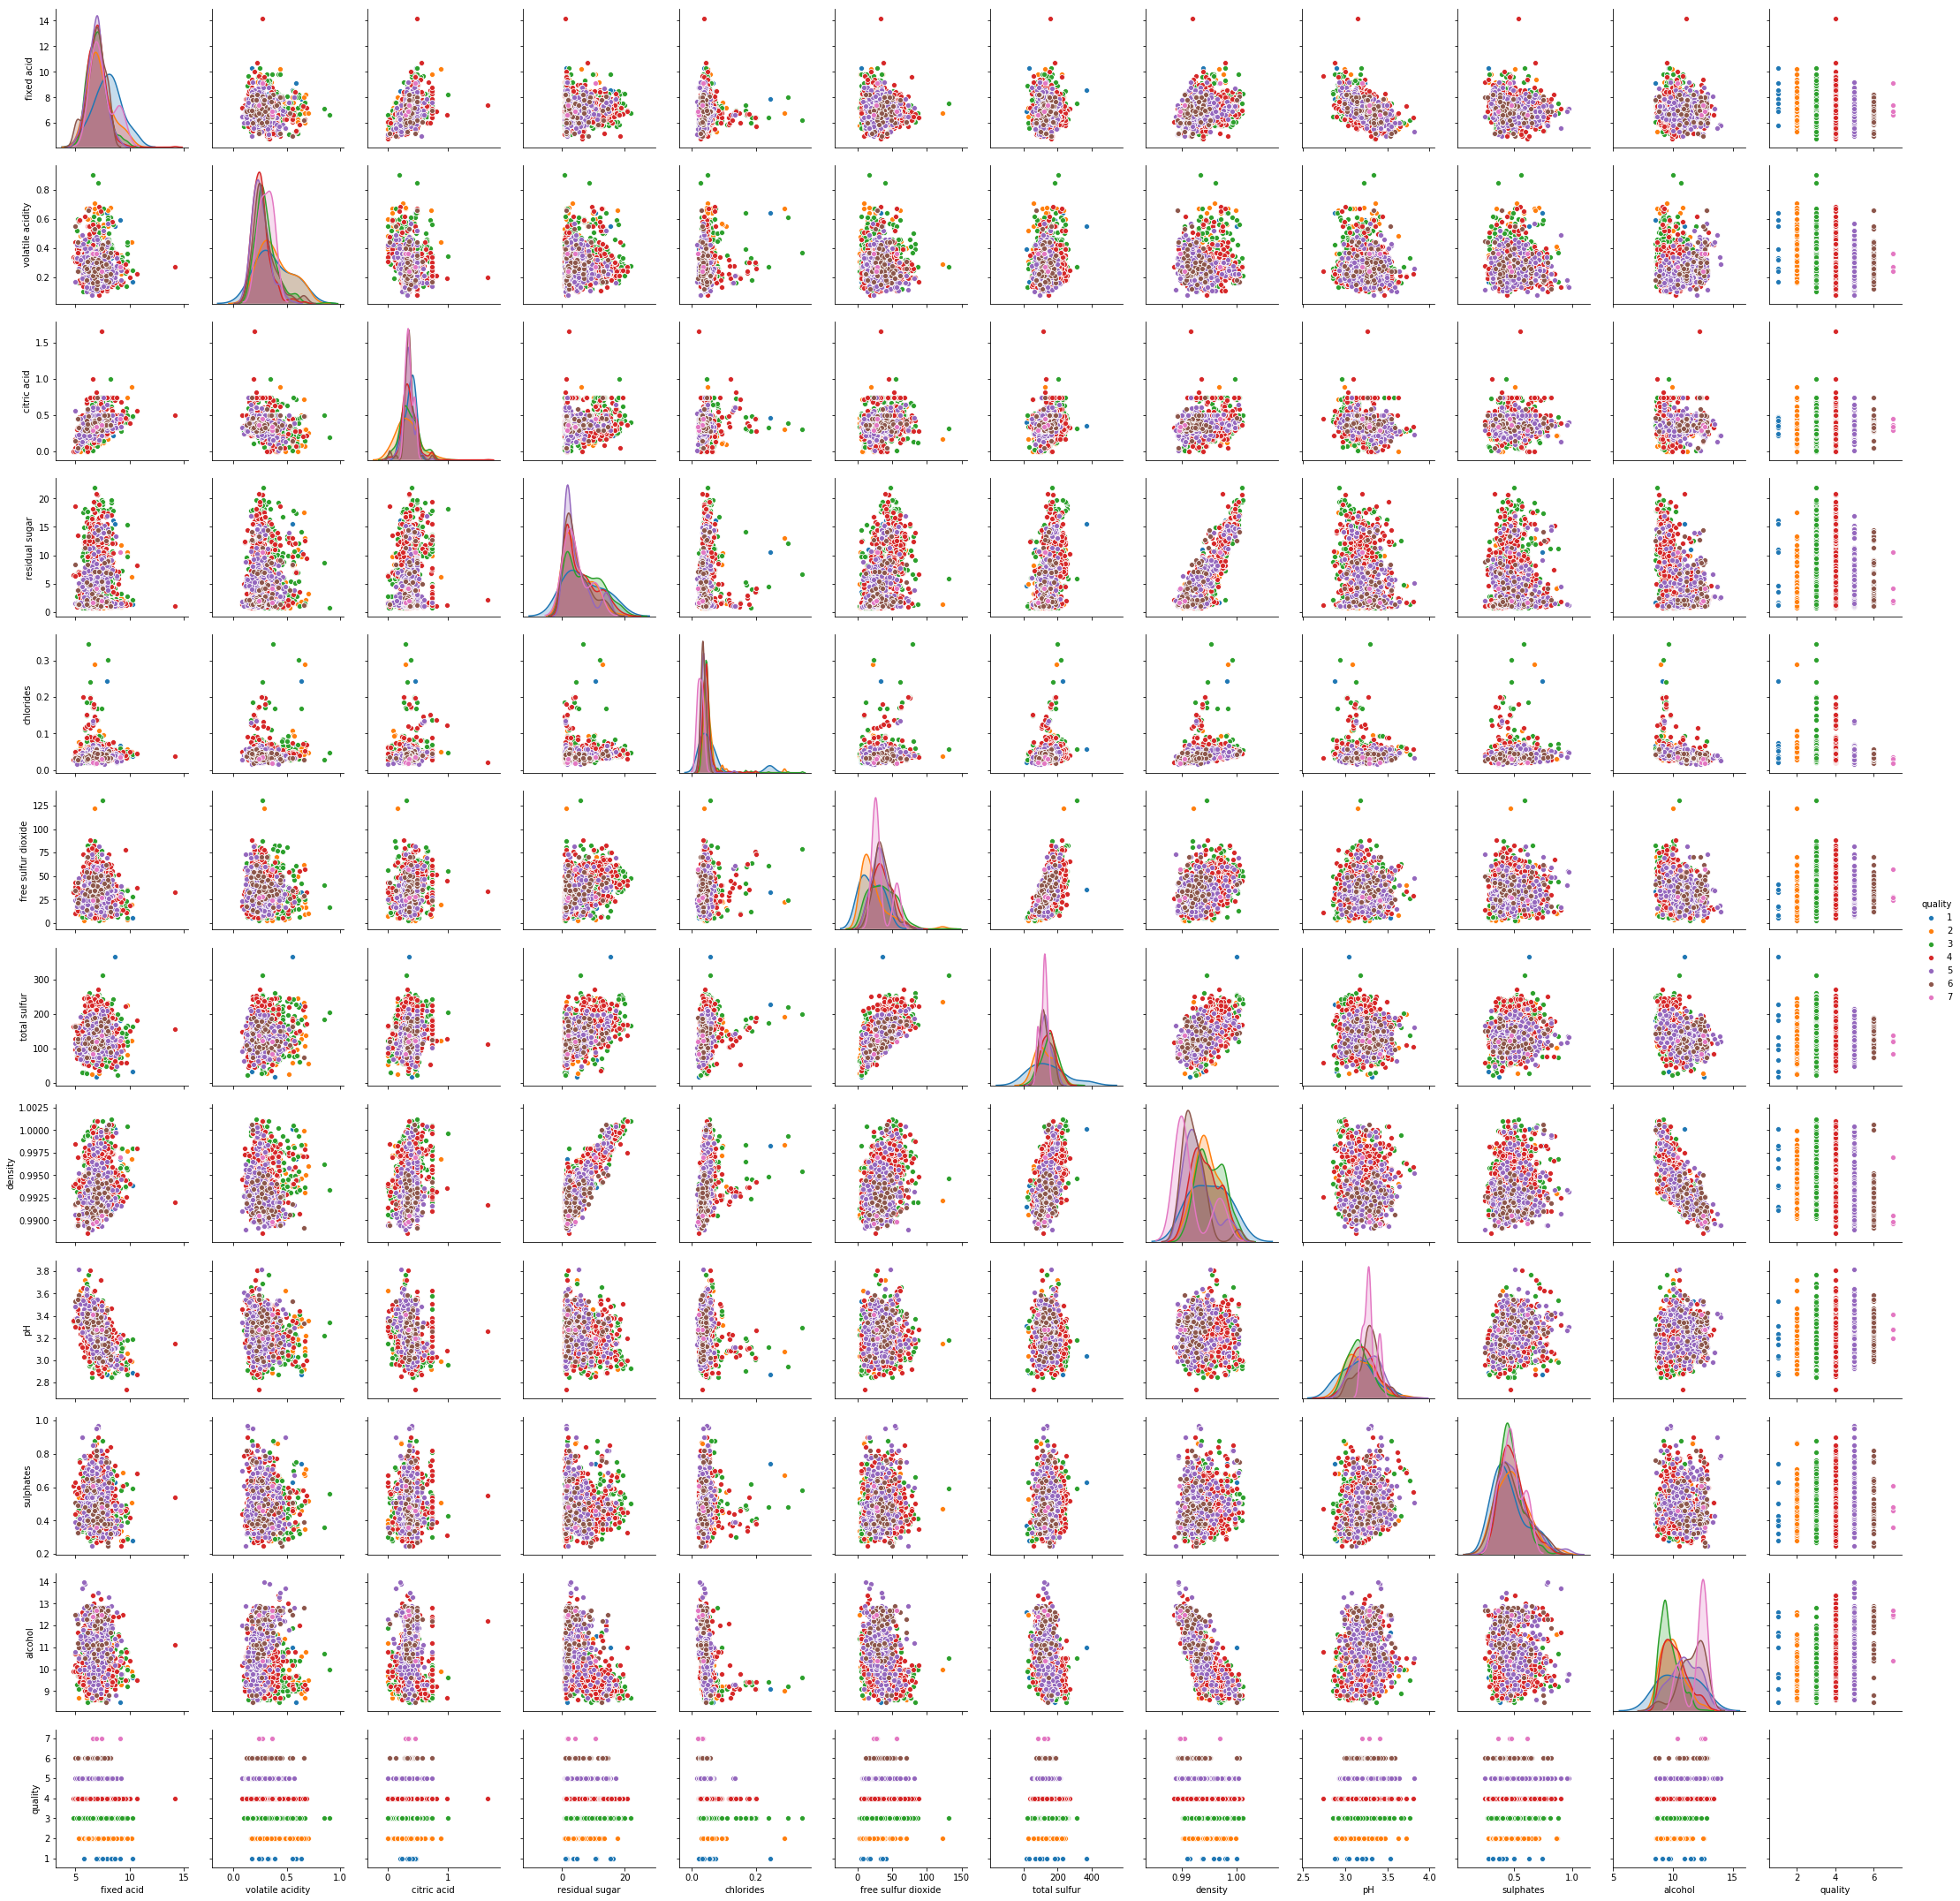

In [ ]:
sns.pairplot(wine_quality, hue='quality', diag_kind='kde')

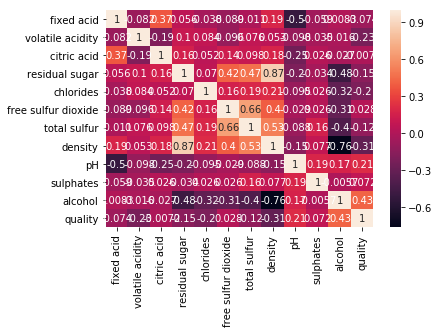

In [ ]:
correlation = df.corr()
sns.heatmap(correlation,
           annot=True,
           xticklabels=correlation.columns.values,
           yticklabels=correlation.columns.values)

In [ ]:
wine_quality['quality'] = df['quality'].mask(df['quality'] < 7, 0)
wine_quality['quality'] = df['quality'].mask(df['quality'] >= 7, 1)

## Fixed Acidity

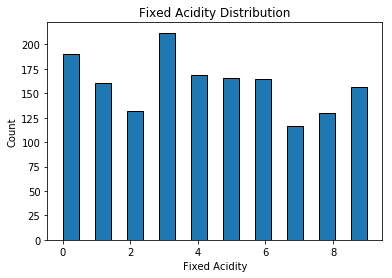

In [ ]:
def plot_hist(data, alpha, title, xlabel, ylabel):
    bins = np.linspace(math.ceil(min(data)),
                      math.floor(max(data)),
                      20)
    plt.hist(data, bins=bins, alpha=alpha, edgecolor='black')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()
    
plot_hist(wine_quality['fixed acid'], 1 , 'Fixed Acidity Distribution', 'Fixed Acidity', 'Count')


In [ ]:
wine_quality['fixed acid'] = pd.qcut(file_path['fixed acid'], q=10, labels=[0,1,2,3,4,5,6,7,8,9], precision=1.0)


## Volatile Acidity

In [ ]:
wine_quality['volatile acidity'].describe()

count     1598
unique      10
top          4
freq       183
Name: volatile acidity, dtype: int64

In [ ]:
wine_quality['volatile acidity'] = pd.qcut(df['volatile acidity'], q=10, labels=[0,1,2,3,4,5,6,7,8,9], precision=1.0)


In [ ]:
wine_quality['volatile acidity'].describe()

count     1598
unique      10
top          4
freq       183
Name: volatile acidity, dtype: int64

## Citric Acid

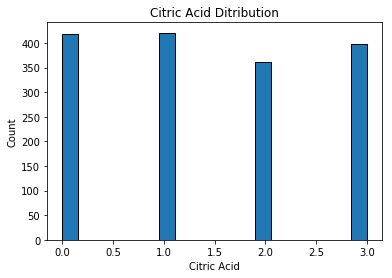

In [ ]:
plot_hist(wine_quality['citric acid'], 1 , 'Citric Acid Ditribution', 'Citric Acid', 'Count')


In [ ]:
wine_quality['citric acid'] = pd.qcut(df['citric acid'], q=4, labels=[0,1,2,3], precision=1.0)


## Residual Sugar

In [ ]:
wine_quality['residual sugar'] = df['residual sugar'].mask(df['residual sugar'] < 1, 0)
wine_quality['residual sugar'] = df['residual sugar'].mask((df['residual sugar'] >= 1) & (file_path['residual sugar'] <= 10), 1)
wine_quality['residual sugar'] = df['residual sugar'].mask(df['residual sugar'] > 10, 2)
        

## Chlorides

In [ ]:
wine_quality['chlorides'].describe()

count    1598.000000
mean        0.046362
std         0.022990
min         0.017000
25%         0.037000
50%         0.044000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

In [ ]:
wine_quality['chlorides'] = pd.qcut(df['chlorides'], q=4, labels=[0,1,2,3], precision=1.0)

## Free Sulphur Dioxide

In [ ]:
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.9) &
																(wine_quality['free sulfur dioxide'] >= 92), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.8) & (wine_quality['pH'] < 3.9) &
																(wine_quality['free sulfur dioxide'] >= 78) & (wine_quality['free sulfur dioxide'] < 92), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.7) & (wine_quality['pH'] < 3.8) &
																(wine_quality['free sulfur dioxide'] >= 64) & (wine_quality['free sulfur dioxide'] < 78), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.8) & (wine_quality['pH'] < 3.9) &
																(wine_quality['free sulfur dioxide'] >= 50) & (wine_quality['free sulfur dioxide'] < 64), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.7) & (wine_quality['pH'] < 3.8) &
																(wine_quality['free sulfur dioxide'] >= 40) & (wine_quality['free sulfur dioxide'] < 50), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.8) & (wine_quality['pH'] < 3.9) &
																(wine_quality['free sulfur dioxide'] >= 31) & (wine_quality['free sulfur dioxide'] < 40), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.7) & (wine_quality['pH'] < 3.8) &
																(wine_quality['free sulfur dioxide'] >= 27) & (wine_quality['free sulfur dioxide'] < 31), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.8) & (wine_quality['pH'] < 3.9) &
																(wine_quality['free sulfur dioxide'] >= 21) & (wine_quality['free sulfur dioxide'] < 27), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.7) & (wine_quality['pH'] < 3.8) &
																(wine_quality['free sulfur dioxide'] >= 17) & (wine_quality['free sulfur dioxide'] < 21), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] >= 3.8) & (wine_quality['pH'] < 3.9) &
																(wine_quality['free sulfur dioxide'] >= 12) & (wine_quality['free sulfur dioxide'] < 17), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask((wine_quality['pH'] < 3.0) &
																(wine_quality['free sulfur dioxide'] < 12), 1)
wine_quality['free sulfur dioxide'] = wine_quality['free sulfur dioxide'].mask(wine_quality['free sulfur dioxide'] != 1, 0)


## Total Sulfur Dioxide

In [ ]:
wine_quality['total sulfur'] = wine_quality['total sulfur'].mask(wine_quality['free sulfur dioxide'] == 0, 0)
wine_quality['total sulfur'] = wine_quality['total sulfur'].mask(wine_quality['free sulfur dioxide'] == 1, 1)

## Density

In [ ]:
wine_quality['density'].describe()

count    1598.000000
mean        0.994390
std         0.002685
min         0.988600
25%         0.992325
50%         0.994000
75%         0.996500
max         1.001200
Name: density, dtype: float64

In [ ]:
wine_quality['density'] = pd.qcut(wine_quality['density'], q=4, labels=[0, 1, 2, 3], precision=1.0)

## pH Value

In [ ]:
wine_quality['pH'] = wine_quality['pH'].mask(wine_quality['pH'] > 3.6, 2)
wine_quality['pH'] = wine_quality['pH'].mask(wine_quality['pH'] >= 3.3, 1)
wine_quality['pH'] = wine_quality['pH'].mask(wine_quality['pH'] < 3.3, 0)

## Sulphates

0


ValueError: `bins` must increase monotonically, when an array

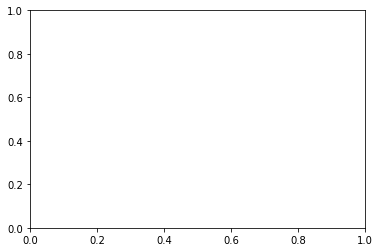

In [ ]:
plot_hist(wine_quality['sulphates'], 0.5 ,  'Sulphates Distribution', 'Sulphates', 'Count')



In [ ]:
wine_quality['sulphates'] = pd.qcut(wine_quality['sulphates'], q=4, labels=[0, 1, 2, 3], precision=1.0)

## Alcohol



In [ ]:
wine_quality['alcohol'] = wine_quality['alcohol'].mask(wine_quality['alcohol'] < 10, 0)
wine_quality['alcohol'] = wine_quality['alcohol'].mask((wine_quality['alcohol'] >= 10) & (wine_quality['alcohol'] < 11.5), 1)
wine_quality['alcohol'] = wine_quality['alcohol'].mask((wine_quality['alcohol'] >= 11.5) & (wine_quality['alcohol'] < 13.5), 2)
wine_quality['alcohol'] = wine_quality['alcohol'].mask(wine_quality['alcohol'] >= 13.5, 3)

## Outcome

In [ ]:
wine_quality.head(20)

,fixed acid,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur,density,pH,sulphates,alcohol,quality
0,4,5,2,2.00,2,0.0,0.0,1.0010,0.0,1,0.0,4
1,1,6,1,1.60,2,0.0,0.0,0.9940,0.0,2,0.0,4
2,8,5,2,6.90,2,0.0,0.0,0.9951,0.0,1,1.0,4
3,5,3,1,8.50,3,0.0,0.0,0.9956,0.0,0,0.0,4
4,5,3,1,8.50,3,0.0,0.0,0.9956,0.0,0,0.0,4
5,8,5,2,6.90,2,0.0,0.0,0.9951,0.0,1,1.0,4
6,1,7,0,7.00,2,0.0,0.0,0.9949,0.0,1,0.0,4
7,4,5,2,2.00,2,0.0,0.0,1.0010,0.0,1,0.0,4
8,1,6,1,1.60,2,0.0,0.0,0.9940,0.0,2,0.0,4
9,8,2,2,1.50,1,0.0,0.0,0.9938,0.0,1,1.0,4



##  Logistic Regression Model - Machine Learning Model

#### Prediction of Data

In [ ]:
# Prediction Outcome
Y = wine_quality['quality']

# Predictor variables
X = wine_quality.drop("quality", axis=1)

# Split into test - train validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=0)

#### Test and Cross Validate Models

In [ ]:
# We will be using Logistic regression algorithm from the given Machine learning algorithm to test and cross validate the given set of data to check the accuracy of red wine quality

# Logistic Regression

logistic = LogisticRegression()

logistic_scores = cross_val_score(logistic, X_train, Y_train, cv=10, scoring="accuracy")

print("Logistic Regression Cross-Validation Scores: ", logistic_scores)
print("Mean: ", logistic_scores.mean())
print("Standard Deviation: ", logistic_scores.std())

C:\Users\pandh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pandh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pandh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pandh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pandh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

Logistic Regression Cross-Validation Scores:  [0.46341463 0.48360656 0.53719008 0.45833333 0.47058824 0.45378151
 0.47058824 0.5210084  0.48305085 0.44915254]
Mean:  0.4790714383886482
Standard Deviation:  0.027434911184196324


C:\Users\pandh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pandh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
